In [52]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('main.csv')
df.dropna(inplace=True) 
df

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,untrustworthy
1,4,1,4,sport,untrustworthy
2,1,4,4,sport,trustworthy
3,2,1,4,sport,trustworthy
4,3,1,4,sport,trustworthy
...,...,...,...,...,...
317,2,1,2,holiday,untrustworthy
318,1,1,1,holiday,trustworthy
319,1,1,1,holiday,trustworthy
320,1,1,1,holiday,trustworthy


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ctrust    322 non-null    int64 
 1   cuntrust  322 non-null    int64 
 2   last      322 non-null    int64 
 3   context   322 non-null    object
 4   score     322 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.1+ KB


In [55]:
print('ctrust',df.ctrust.unique())
print('cuntrust',df.cuntrust.unique())
print('last',df['last'].unique())
print('context',df.context.unique())
print('score',df.score.unique())

ctrust [4 1 2 3]
cuntrust [1 4 3 5]
last [4 1 3 2]
context ['sport' 'game' 'ECommerce' 'holiday']
score ['untrustworthy' 'trustworthy']


In [56]:
df['score'].replace({'untrustworthy':0,'trustworthy':1},inplace=True)
df

,ctrust,cuntrust,last,context,score
0,4,1,4,sport,0
1,4,1,4,sport,0
2,1,4,4,sport,1
3,2,1,4,sport,1
4,3,1,4,sport,1
...,...,...,...,...,...
317,2,1,2,holiday,0
318,1,1,1,holiday,1
319,1,1,1,holiday,1
320,1,1,1,holiday,1


In [57]:
df['context'].replace({'sport':1,'game':2,'ECommerce':3,'holiday':4},inplace=True)
df

,ctrust,cuntrust,last,context,score
0,4,1,4,1,0
1,4,1,4,1,0
2,1,4,4,1,1
3,2,1,4,1,1
4,3,1,4,1,1
...,...,...,...,...,...
317,2,1,2,4,0
318,1,1,1,4,1
319,1,1,1,4,1
320,1,1,1,4,1


In [58]:
korelasi = df.corr()
korelasi

,ctrust,cuntrust,last,context,score
ctrust,1.000000,-0.449770,0.092428,-0.493037,0.021177
cuntrust,-0.449770,1.000000,0.373770,-0.170880,-0.268555
last,0.092428,0.373770,1.000000,-0.723423,-0.198514
context,-0.493037,-0.170880,-0.723423,1.000000,-0.202547
score,0.021177,-0.268555,-0.198514,-0.202547,1.000000


In [59]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=df[df.columns[:4]]
Y=df['score']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

context     0.372921
last        0.281464
ctrust      0.230327
cuntrust    0.115288
dtype: float64

In [60]:
data = (df[["last", "context"]])
data.head()

,last,context
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 321
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   last     322 non-null    int64
 1   context  322 non-null    int64
dtypes: int64(2)
memory usage: 7.5 KB


In [62]:
dataa = (data[["last", "context"]])
X = dataa.iloc[:, [0, 1]].values
X

array([[4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4,

In [63]:
m=X.shape[0] 
n=X.shape[1] 

In [64]:
n_iter=10
K=2

In [65]:
Centroids=np.array([]).reshape(n,0)

In [66]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [67]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [68]:
Output={}

In [69]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [70]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

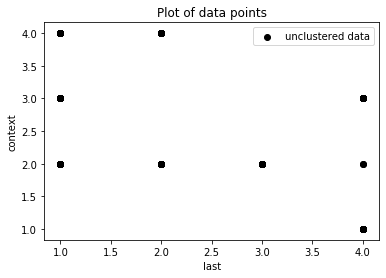

In [71]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('last')
plt.ylabel('context')
plt.legend()
plt.title('Plot of data points')
plt.show()

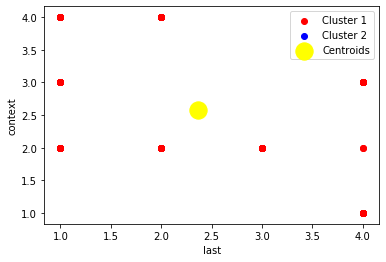

In [72]:
color=['red','blue']
labels=['Cluster 1','Cluster 2']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('last')
plt.ylabel('context')
plt.legend()
plt.show()

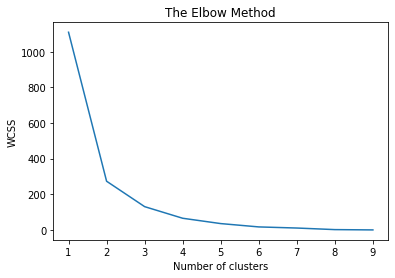

In [74]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 123)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

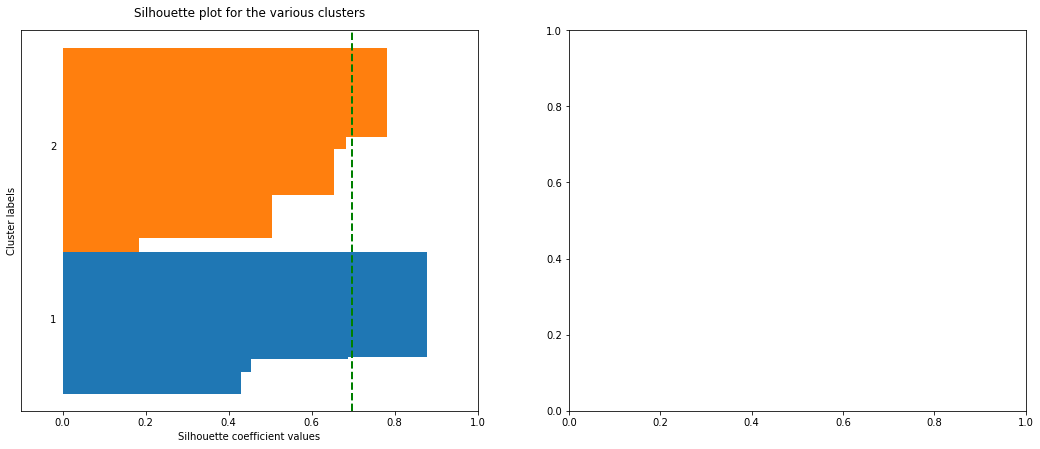

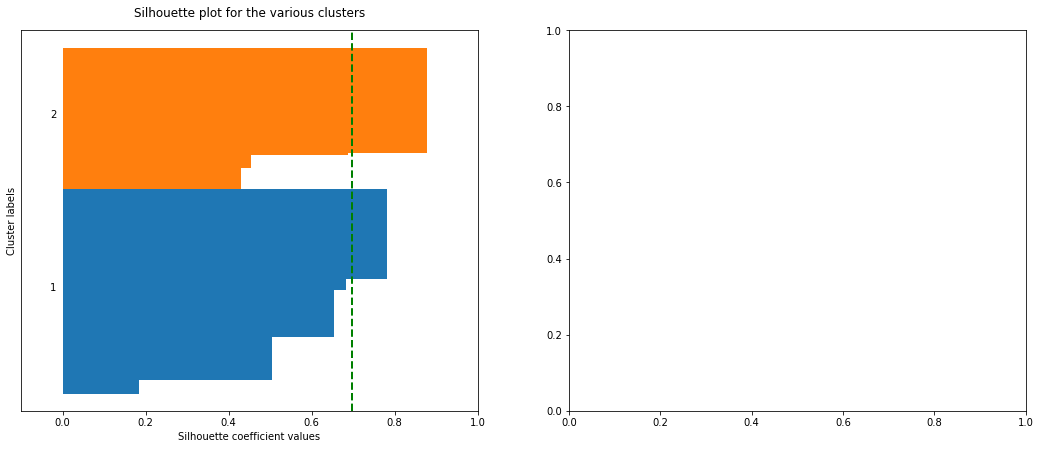

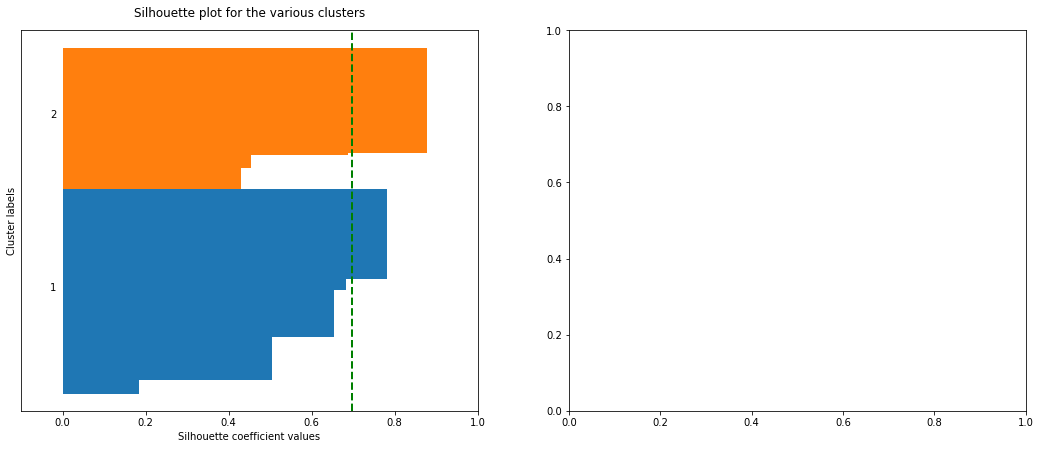

In [75]:
from sklearn.metrics import silhouette_samples

for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=K)
    labels = km.fit_predict(data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    

Number Of Clusters:
2
Silhouette score value
0.8350070988389441
Number Of Clusters:
3
Silhouette score value
0.9271804376709273
Number Of Clusters:
4
Silhouette score value
0.6231616228393883
Number Of Clusters:
5
Silhouette score value
0.4166481999026493
Number Of Clusters:
6
Silhouette score value
0.4220257130096622
Number Of Clusters:
7
Silhouette score value
0.4374125771985665
Number Of Clusters:
8
Silhouette score value
0.4407948165688113
Number Of Clusters:
9
Silhouette score value
0.3453591133978316
Number Of Clusters:
10
Silhouette score value
0.3436446250897196
Number Of Clusters:
11
Silhouette score value
0.3479487199877075
Number Of Clusters:
12
Silhouette score value
0.33152925469225747
Number Of Clusters:
13
Silhouette score value
0.35941919469815226
Number Of Clusters:
14
Silhouette score value
0.3410296451456726
Number Of Clusters:
15
Silhouette score value
0.35616613545328574
Number Of Clusters:
16
Silhouette score value
0.3541220925932911
Number Of Clusters:
17
Silhoue

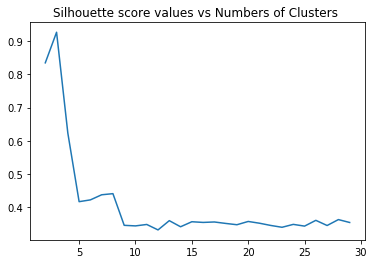

Optimal number of components is:
3


In [49]:
from sklearn import cluster
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt


obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()

NumberOfClusters=range(2,30)

for i in NumberOfClusters:
    
    classifier=cluster.KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True)
    classifier.fit(obs)
    labels= classifier.predict(obs)
    print("Number Of Clusters:")
    print(i)
    print("Silhouette score value")
    print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))

plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()

Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

In [76]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = K).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))
sil

[0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554,
 0.6971104316953554]